In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from src.baseSIR import no_ext_sir
from src.baseSIR import timed_sir
from src.baseSIR import real_si
from decimal import Decimal, ROUND_UP
import time
import pandas as pd
from src.ABC import ABC_rejection
from src.ABC import ABC_core
from src.ABC import sum_sqrt_sq_distance

In [12]:
#applied_ABC1 = np.genfromtxt("../../Home made ABC Results/Traj_fixed_g_1_N_1000_b_3.csv",delimiter=",")
#applied_ABC2 = np.genfromtxt("../../Home made ABC Results/Traj_fixed_g_1_N_100_b_3.csv",delimiter=",")
#applied_ABC3 = np.genfromtxt("../../Home made ABC Results/Traj_fixed_g_1_N_10_b_3.csv",delimiter=",")

applied_ABC1 = np.genfromtxt("../../Home made ABC Results/Traj1_1000b_mixed.csv",delimiter=",")
applied_ABC2 = np.genfromtxt("../../Home made ABC Results/Traj1_100b_mixed.csv",delimiter=",")
applied_ABC3 = np.genfromtxt("../../Home made ABC Results/Traj1_10b_mixed.csv",delimiter=",")

In [13]:
def threshold_scheduler(results,threshold_references):
    sort_res = results.sort_values(by="Distance")
    output = []
    for i in threshold_references:
        temp = sort_res.iloc[0:int(len(sort_res.index)/(100/i))]
        output.append(temp.iloc[-1,1])
    return output


In [24]:
graph_ABC = applied_ABC3
reference = [1,2,5,10,20,50]

In [25]:
df_ABC = pd.DataFrame(graph_ABC, columns=["Beta","Distance"])
threshold_schedule = threshold_scheduler(df_ABC,reference)

C:\Users\ollie\AppData\Local\Temp\ipykernel_32668\1375873423.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


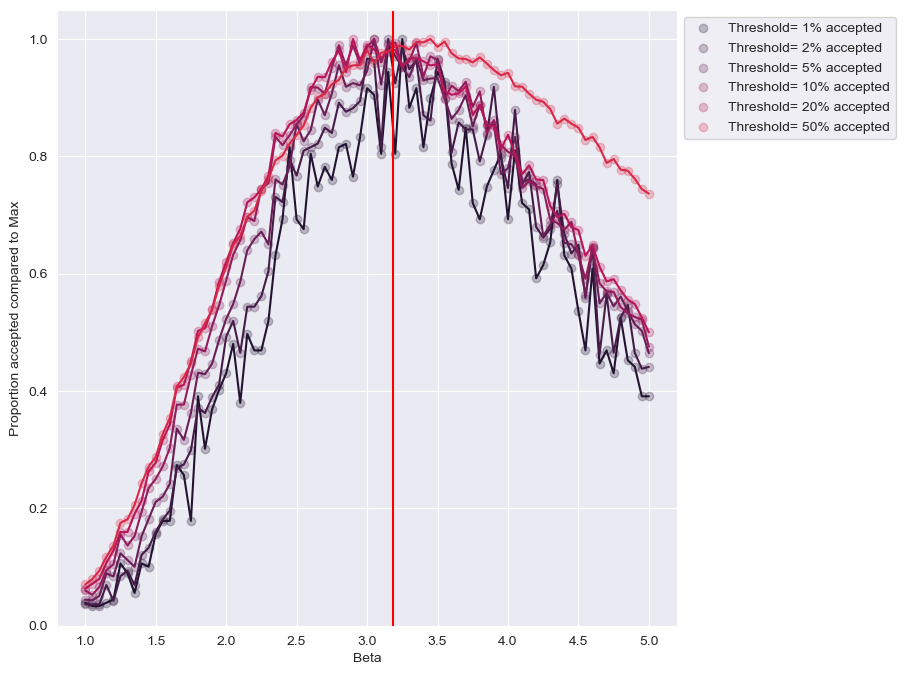

In [27]:
fig, ax0 = plt.subplots(figsize = (8,8))
cols = sns.color_palette("rocket",n_colors=10)
for i in range(len(threshold_schedule)):

    thresh = ABC_rejection(threshold_schedule[i],graph_ABC)
    ploted = pd.DataFrame(thresh, columns=["Beta","Counts"])
    bet_dis = ploted.groupby("Beta").count()
    plot_bet_dis = bet_dis[bet_dis["Counts"] !=0 ]
    max_scale = max(plot_bet_dis["Counts"])
    plot_bet_dis["Counts"] = plot_bet_dis["Counts"]/max_scale
    spline = sp.interpolate.splrep(plot_bet_dis.index,plot_bet_dis["Counts"],s=0)
    ax0.scatter(bet_dis.index,plot_bet_dis["Counts"], label = f"Threshold= {reference[i]}% accepted",color = cols[i], alpha = 0.25)
    ax0.plot(plot_bet_dis.index,sp.interpolate.BSpline(*spline)(plot_bet_dis.index), color = cols[i])
mles = np.genfromtxt("../../Data/R0_3/Fitted/MLE_b_3.csv")
mle1 = mles[0]
ax0.set_ylabel("Proportion accepted compared to Max")
ax0.set_xlabel("Beta")
ax0.axvline(mle1, color = "red")
ax0.legend(bbox_to_anchor = (1,1))
ax0.set_ylim(0,1.05)
#ax0.set_xlim(1,5)
fig.show()